In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [2]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Bergamo=pd.read_csv("listings Bergamo.csv")
Bergamo

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15526,"Classy apartment ""Palazzo""",60754,Andrea,NaN,Solto Collina,45.783200,10.026600,Entire home/apt,142.0,4,42,2022-08-13,0.26,5,16,0,CIR: 016200 – CNI -00005
1,15542,"Suite with lake view ""Panorama""",60754,Andrea,NaN,Solto Collina,45.782840,10.024570,Entire home/apt,103.0,2,49,2024-06-24,0.33,5,7,2,CIR: 016200 – CNI -00005
2,116423,Casetta a 12km da lago d'iseo,588254,Angela,NaN,Bossico,45.828400,10.044760,Entire home/apt,40.0,2,11,2023-12-10,0.15,3,303,1,CIR 016033-CNI-00002T00146
3,179345,Bossico Vicino a Montisola e lago D'iseo,588254,Angela,NaN,Bossico,45.827220,10.046020,Entire home/apt,62.0,1,21,2024-01-05,0.28,3,304,4,CIR 016033-CNI-00002T00146
4,215933,Donizetti Royal suite private toilet,816380,Marcella,NaN,Bergamo,45.698385,9.675597,Private room,117.0,1,72,2024-04-02,0.53,15,310,13,cir: 016024REC00185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,1186901413507977481,Piano inferiore villa,541367730,Faaris,NaN,Verdellino,45.596684,9.600798,Entire home/apt,64.0,1,0,NaN,NaN,1,270,0,NaN
3521,1186914323037112556,Belvedere House,585648838,Lucia,NaN,Zogno,45.804400,9.692301,Entire home/apt,65.0,1,0,NaN,NaN,1,365,0,016246-LNI-00005
3522,1186924504819236887,"Casa nel Borgo, Castione della Presolana Ospitar",63675935,Ospitar,NaN,Castione della Presolana,45.915645,10.038150,Entire home/apt,137.0,1,0,NaN,NaN,6,76,0,NaN
3523,1187615475138323093,appartamento 11/15 bilocale,566697603,Maria Giulia,NaN,Bergamo,45.689309,9.670949,Entire home/apt,156.0,1,0,NaN,NaN,8,323,0,NaN


In [4]:
#Identificar valores nulos por columna
Valores_Nulos=Bergamo.isnull().sum()
Valores_Nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3525
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                               99
minimum_nights                       0
number_of_reviews                    0
last_review                        644
reviews_per_month                  644
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2351
dtype: int64

In [5]:
#Inofrmación tipos de columnas
Tipos_Columnas = Bergamo.dtypes
print(Tipos_Columnas)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [29]:
#Realizamos una copia del dataframe
copia_Bergamo = Bergamo.copy()

In [30]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
copia_Bergamo["last_review"]=copia_Bergamo["last_review"].fillna("SIN FECHA")

In [31]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
copia_Bergamo["reviews_per_month"]=copia_Bergamo["reviews_per_month"].fillna("0000")

In [32]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
copia_Bergamo["price"]=copia_Bergamo["price"].fillna(round(copia_Bergamo ['price'].mean(),1))

In [33]:
#Eliminamos esta columna ya que todos los datos son nulos
copia_Bergamo= copia_Bergamo.drop(columns=['neighbourhood_group'])
copia_Bergamo = copia_Bergamo.drop(columns=['license'])

In [34]:
#Corroboramos valores nulos
valores_nulos=copia_Bergamo.isnull().sum()
valores_nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

ELIMINAR OUTLIERS POR EL METODO DE DESVIACION ESTANDAR

In [35]:
copia_Bergamo.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                  object
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [36]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = copia_Bergamo.select_dtypes(include = 'object')
columnas_cuantitativas = copia_Bergamo.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

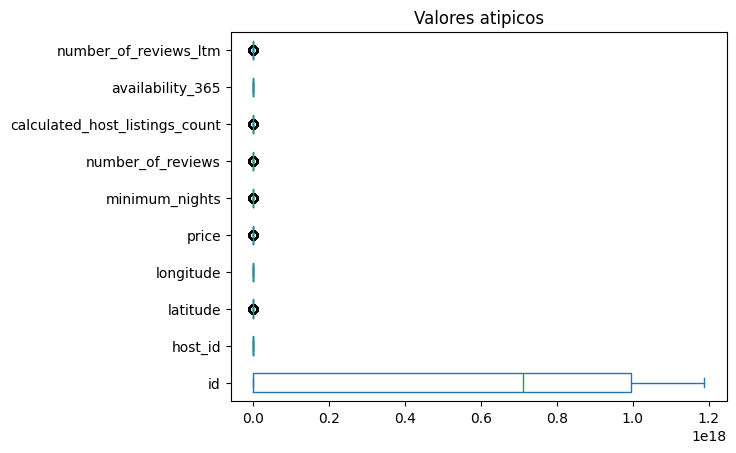

In [37]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [38]:
#Identificar los limites superior e inferior
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido id                                1.989760e+18
host_id                           8.467253e+08
latitude                          4.606366e+01
longitude                         1.028162e+01
price                             4.902099e+03
minimum_nights                    4.073137e+01
number_of_reviews                 2.509617e+02
calculated_host_listings_count    2.618635e+01
availability_365                  5.376195e+02
number_of_reviews_ltm             6.508050e+01
dtype: float64
Limite inferior permitido id                               -9.006654e+17
host_id                          -3.463925e+08
latitude                          4.543691e+01
longitude                         9.267963e+00
price                            -4.597309e+03
minimum_nights                   -3.485620e+01
number_of_reviews                -1.874485e+02
calculated_host_listings_count   -1.725755e+01
availability_365                 -1.188451e+02
number_of_reviews_ltm            -4.5479

In [39]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [40]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

id                                 0
host_id                            0
latitude                           0
longitude                          0
price                              3
minimum_nights                    11
number_of_reviews                 72
calculated_host_listings_count    82
availability_365                   0
number_of_reviews_ltm             87
dtype: int64

In [41]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))
columnas_cuantitativas_limpio

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,15526,60754,45.783200,10.026600,142.0,4.0,42.0,5.0,16,0.0
1,15542,60754,45.782840,10.024570,103.0,2.0,49.0,5.0,7,2.0
2,116423,588254,45.828400,10.044760,40.0,2.0,11.0,3.0,303,1.0
3,179345,588254,45.827220,10.046020,62.0,1.0,21.0,3.0,304,4.0
4,215933,816380,45.698385,9.675597,117.0,1.0,72.0,15.0,310,13.0
...,...,...,...,...,...,...,...,...,...,...
3520,1186901413507977481,541367730,45.596684,9.600798,64.0,1.0,0.0,1.0,270,0.0
3521,1186914323037112556,585648838,45.804400,9.692301,65.0,1.0,0.0,1.0,365,0.0
3522,1186924504819236887,63675935,45.915645,10.038150,137.0,1.0,0.0,6.0,76,0.0
3523,1187615475138323093,566697603,45.689309,9.670949,156.0,1.0,0.0,8.0,323,0.0


In [42]:
#Se juntan las columnas cualitativas con las cuantitativas
Bergamo_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Bergamo_outliers

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name,host_name,neighbourhood,room_type,last_review,reviews_per_month
0,15526,60754,45.783200,10.026600,142.0,4.0,42.0,5.0,16,0.0,"Classy apartment ""Palazzo""",Andrea,Solto Collina,Entire home/apt,2022-08-13,0.26
1,15542,60754,45.782840,10.024570,103.0,2.0,49.0,5.0,7,2.0,"Suite with lake view ""Panorama""",Andrea,Solto Collina,Entire home/apt,2024-06-24,0.33
2,116423,588254,45.828400,10.044760,40.0,2.0,11.0,3.0,303,1.0,Casetta a 12km da lago d'iseo,Angela,Bossico,Entire home/apt,2023-12-10,0.15
3,179345,588254,45.827220,10.046020,62.0,1.0,21.0,3.0,304,4.0,Bossico Vicino a Montisola e lago D'iseo,Angela,Bossico,Entire home/apt,2024-01-05,0.28
4,215933,816380,45.698385,9.675597,117.0,1.0,72.0,15.0,310,13.0,Donizetti Royal suite private toilet,Marcella,Bergamo,Private room,2024-04-02,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,1186901413507977481,541367730,45.596684,9.600798,64.0,1.0,0.0,1.0,270,0.0,Piano inferiore villa,Faaris,Verdellino,Entire home/apt,SIN FECHA,0000
3521,1186914323037112556,585648838,45.804400,9.692301,65.0,1.0,0.0,1.0,365,0.0,Belvedere House,Lucia,Zogno,Entire home/apt,SIN FECHA,0000
3522,1186924504819236887,63675935,45.915645,10.038150,137.0,1.0,0.0,6.0,76,0.0,"Casa nel Borgo, Castione della Presolana Ospitar",Ospitar,Castione della Presolana,Entire home/apt,SIN FECHA,0000
3523,1187615475138323093,566697603,45.689309,9.670949,156.0,1.0,0.0,8.0,323,0.0,appartamento 11/15 bilocale,Maria Giulia,Bergamo,Entire home/apt,SIN FECHA,0000


In [43]:
#Comprobamos que no existan valores nulos
valores_nulos_Bergamo_outliers = Bergamo_outliers.isnull().sum()
valores_nulos_Bergamo_outliers 

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
name                              0
host_name                         0
neighbourhood                     0
room_type                         0
last_review                       0
reviews_per_month                 0
dtype: int64